##Global Data on Sustainable Energy

In [62]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from matplotlib import pyplot as plt
import geopandas as gpd
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

##Loading The Dataset

In [5]:
df = pd.read_csv("/content/global-data-on-sustainable-energy.csv")
df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,"6,52,230",33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,"6,52,230",33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,"6,52,230",33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,"6,52,230",33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,"6,52,230",33.93911,67.709953


In [53]:
#actual dataset without changing any column name
df1=df = pd.read_csv("/content/global-data-on-sustainable-energy.csv")
df1.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,"6,52,230",33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,"6,52,230",33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,"6,52,230",33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,"6,52,230",33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,"6,52,230",33.93911,67.709953


##EDA(Explotary Data Analysis):-

In [6]:
df.shape

(3649, 21)

In [7]:
#summary statistic
df.describe()

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Latitude,Longitude
count,3649.000000,3639.000000,3480.000000,2718.000000,1.560000e+03,3455.000000,3628.000000,3523.000000,3628.000000,3607.000000,3649.000000,3442.000000,3.221000e+03,1512.000000,3332.000000,3367.000000,3648.000000,3648.000000
mean,2010.038367,78.933702,63.255287,113.137498,9.422400e+07,32.638165,70.365003,13.450190,23.968010,36.801182,25743.981745,5.307345,1.598665e+05,11.986707,3.441610,13283.774348,18.246388,14.822695
std,6.054228,30.275541,39.043658,244.167256,2.981544e+08,29.894901,348.051866,73.006623,104.431085,34.314884,34773.221366,3.532020,7.736611e+05,14.994644,5.686720,19709.866716,24.159232,66.348148
min,2000.000000,1.252269,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,1.000000e+01,0.000000,-62.075920,111.927225,-40.900557,-175.198242
25%,2005.000000,59.800890,23.175000,3.540000,2.600000e+05,6.515000,0.290000,0.000000,0.040000,2.877847,3116.737300,3.170000,2.020000e+03,2.137095,1.383302,1337.813437,3.202778,-11.779889
50%,2010.000000,98.361570,83.150000,32.910000,5.665000e+06,23.300000,2.970000,0.000000,1.470000,27.865068,13120.570000,4.300000,1.050000e+04,6.290766,3.559855,4578.633208,17.189877,19.145136
75%,2015.000000,100.000000,100.000000,112.210000,5.534750e+07,55.245000,26.837500,0.000000,9.600000,64.403792,33892.780000,6.027500,6.058000e+04,16.841638,5.830099,15768.615365,38.969719,46.199616
max,2020.000000,100.000000,100.000000,3060.190000,5.202310e+09,96.040000,5184.130000,809.410000,2184.940000,100.000010,262585.700000,32.570000,1.070722e+07,86.836586,123.139555,123514.196700,64.963051,178.065032


In [8]:
#unique country
num_countries = df["Entity"].unique().size
print(str(num_countries) + " total countries")

176 total countries


In [9]:
num_years_per_country = df.groupby(by="Entity")["Year"].count().reset_index()
num_years_per_country[num_years_per_country["Year"] != 21]

,Entity,Year
58,French Guiana,1
105,Montenegro,14
140,Serbia,14
149,South Sudan,8


All 176 countries in the dataset have 21 years recorded except French Guiana, Montenegro, Serbia, and South Sudan, which have 1, 14, 14, and 8 years (rows) respectively

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

#Fixing data types
-There are 3 "object" data types, in this case strings. "Entity" (country) should be a string, but Land Area(Km2) and Density\n(P/Km2) should be numeric. This can be fixed by removing the comma's and casting them to a float.

In [11]:
df["Density\\n(P/Km2)"] = df["Density\\n(P/Km2)"].str.replace(",","").astype(float)
df["Land Area(Km2)"] = df["Land Area(Km2)"].str.replace(",","").astype(float)

In [12]:
#check the datatype after change
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [13]:
#check the column name
df.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')

#Rename the column name
-Entity to Country column name.\
-Column name using simple name

In [14]:
new_column_names = [
    "Country",
    "Year",
    "Electricity_Access",
    "Cooking_Fuels",
    "Renewables_Capacity_Per_Capita",
    "Financial_To_Developing_Countries",
    "Renewables_Share_Of_Consumption",
    "Electricity_From_Fossil",
    "Electricity_From_Nuclear",
    "Electricity_From_Renewables",
    "Low-Carbon_Electricity",
    "Energy_Consumption_Per_Capita",
    "Energy_Intensity",
    "CO2_Emissions",
    "Renewable_Share_Energy",
    "GDP_Growth",
    "GDP_per_Capita",
    "Density",
    "Land_Area",
    "Latitude",
    "Longitude"
]
df.columns = new_column_names
df.columns

Index(['Country', 'Year', 'Electricity_Access', 'Cooking_Fuels',
       'Renewables_Capacity_Per_Capita', 'Financial_To_Developing_Countries',
       'Renewables_Share_Of_Consumption', 'Electricity_From_Fossil',
       'Electricity_From_Nuclear', 'Electricity_From_Renewables',
       'Low-Carbon_Electricity', 'Energy_Consumption_Per_Capita',
       'Energy_Intensity', 'CO2_Emissions', 'Renewable_Share_Energy',
       'GDP_Growth', 'GDP_per_Capita', 'Density', 'Land_Area', 'Latitude',
       'Longitude'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            3649 non-null   object 
 1   Year                               3649 non-null   int64  
 2   Electricity_Access                 3639 non-null   float64
 3   Cooking_Fuels                      3480 non-null   float64
 4   Renewables_Capacity_Per_Capita     2718 non-null   float64
 5   Financial_To_Developing_Countries  1560 non-null   float64
 6   Renewables_Share_Of_Consumption    3455 non-null   float64
 7   Electricity_From_Fossil            3628 non-null   float64
 8   Electricity_From_Nuclear           3523 non-null   float64
 9   Electricity_From_Renewables        3628 non-null   float64
 10  Low-Carbon_Electricity             3607 non-null   float64
 11  Energy_Consumption_Per_Capita      3649 non-null   float

#Check the missing value in dataset

In [16]:
df.isnull().sum()

Country                                 0
Year                                    0
Electricity_Access                     10
Cooking_Fuels                         169
Renewables_Capacity_Per_Capita        931
Financial_To_Developing_Countries    2089
Renewables_Share_Of_Consumption       194
Electricity_From_Fossil                21
Electricity_From_Nuclear              126
Electricity_From_Renewables            21
Low-Carbon_Electricity                 42
Energy_Consumption_Per_Capita           0
Energy_Intensity                      207
CO2_Emissions                         428
Renewable_Share_Energy               2137
GDP_Growth                            317
GDP_per_Capita                        282
Density                                 1
Land_Area                               1
Latitude                                1
Longitude                               1
dtype: int64

In [17]:
#how many country has null values
countries_null = df[df.isna().any(axis=1)]["Country"].unique().size
print(str(countries_null) + " countries have columns with null values")

176 countries have columns with null values


it mean every country has some null value in it different column

In [18]:
#percentage of null value present in countrwise column list
percent_nan = (df.isna().sum()/df.shape[0]*100).reset_index()
percent_nan

,index,0
0,Country,0.000000
1,Year,0.000000
2,Electricity_Access,0.274048
3,Cooking_Fuels,4.631406
4,Renewables_Capacity_Per_Capita,25.513839
5,Financial_To_Developing_Countries,57.248561
6,Renewables_Share_Of_Consumption,5.316525
7,Electricity_From_Fossil,0.575500
8,Electricity_From_Nuclear,3.453001
9,Electricity_From_Renewables,0.575500


There are numerous NaN values in multiple rows, however the single NaN value in each of Density, Land Area, Latitude and Longitude are the most interesting. They are all from the same row belonging to French Guiana. This is also the ONLY row for French Guiana, as it only has data for the year 2000.

In [19]:
#check the column has highest null values
n1 = df[(df["Density"].isna()) | (df["Land_Area"].isna()) | (df["Latitude"].isna()) | (df["Longitude"].isna())]
n1

,Country,Year,Electricity_Access,Cooking_Fuels,Renewables_Capacity_Per_Capita,Financial_To_Developing_Countries,Renewables_Share_Of_Consumption,Electricity_From_Fossil,Electricity_From_Nuclear,Electricity_From_Renewables,...,Energy_Consumption_Per_Capita,Energy_Intensity,CO2_Emissions,Renewable_Share_Energy,GDP_Growth,GDP_per_Capita,Density,Land_Area,Latitude,Longitude
1218,French Guiana,2000,NaN,NaN,702.29,NaN,23.84,0.43,0.0,0.0,...,13692.394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##***Treating the NULL/NAN value***

In [20]:
# Drop the row where 'Country' is 'French Guiana' and 'Year' is 2000 because it missing maximum values
df = df.drop(df[(df['Country'] == 'French Guiana') & (df['Year'] == 2000)].index)

In [21]:
#Drop columns with too many missing values
threshold = 0.5 * len(df)  # Example threshold: 50% missing values
df = df.dropna(thresh=threshold, axis=1)
df.shape

(3648, 19)

In [22]:
# Fill numeric columns with the mean
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [23]:
#check the null value after treating missing value
df.isnull().sum()

Country                            0
Year                               0
Electricity_Access                 0
Cooking_Fuels                      0
Renewables_Capacity_Per_Capita     0
Renewables_Share_Of_Consumption    0
Electricity_From_Fossil            0
Electricity_From_Nuclear           0
Electricity_From_Renewables        0
Low-Carbon_Electricity             0
Energy_Consumption_Per_Capita      0
Energy_Intensity                   0
CO2_Emissions                      0
GDP_Growth                         0
GDP_per_Capita                     0
Density                            0
Land_Area                          0
Latitude                           0
Longitude                          0
dtype: int64

##Handling Duplicates

In [24]:
duplicates = df[df.duplicated(keep="first")]
print(str(duplicates.shape[0]) + " duplicate rows")

0 duplicate rows


In [25]:
country_years = df[["Country","Year"]]
duplicate_country_years = country_years[country_years.duplicated(keep="first")]
print(str(duplicate_country_years.shape[0]) + " duplicate country-year combos")

0 duplicate country-year combos


##Handling Outliers

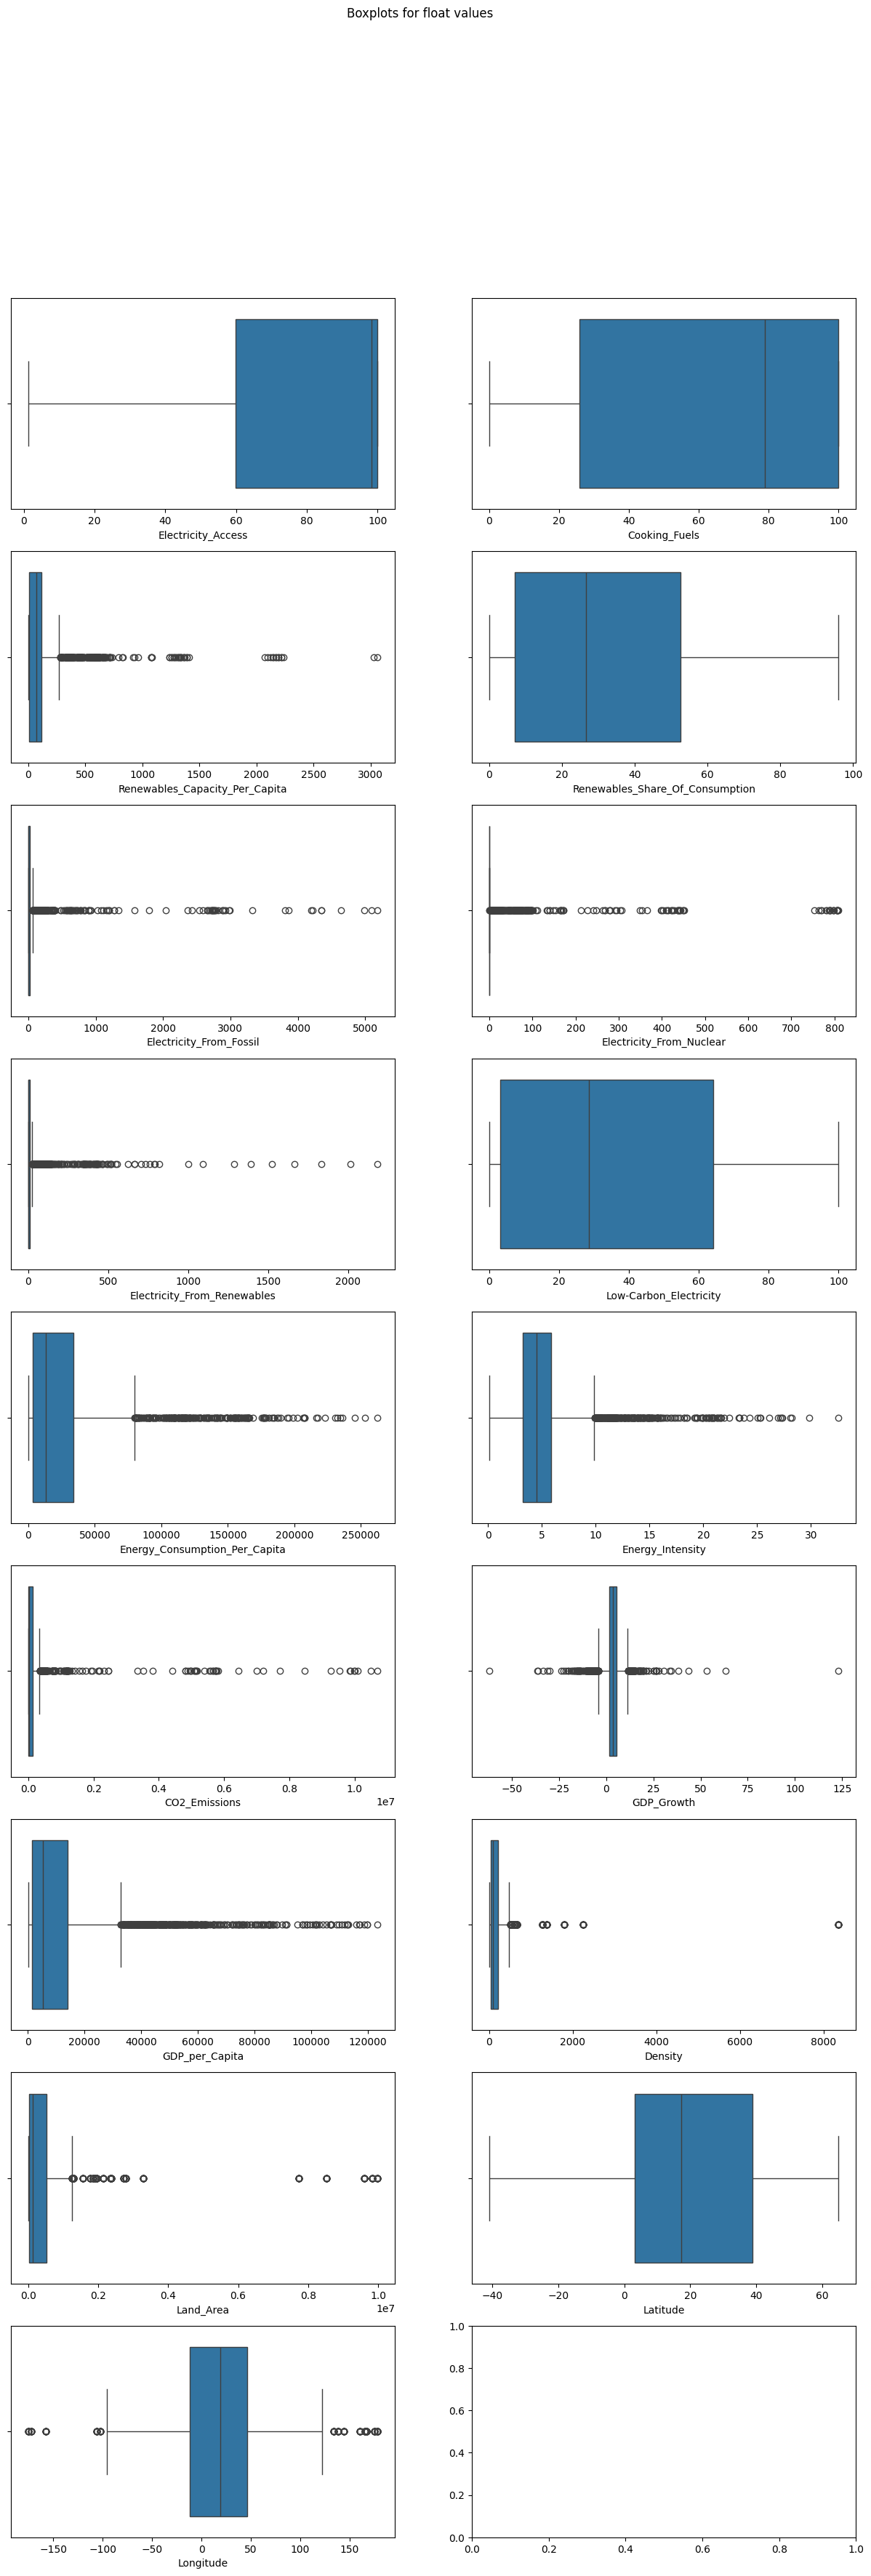

In [26]:
# Visualizing Outliers using Boxplots
i = 2
num_columns = df.shape[1]
fig, axes = plt.subplots(math.ceil((num_columns-2)/2),2, figsize=(15,40))
fig.suptitle("Boxplots for float values")

while i < num_columns:
    sns.boxplot(ax=axes[(i - 2) // 2, (i - 2) % 2], x=df[list(df.columns)[i]])
    i = i + 1

plt.show()

In [27]:
#  Detect and treat outliers using the IQR method

def treat_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

for col in numeric_cols:
    treat_outliers(df, col)

Check the outlier after treating them

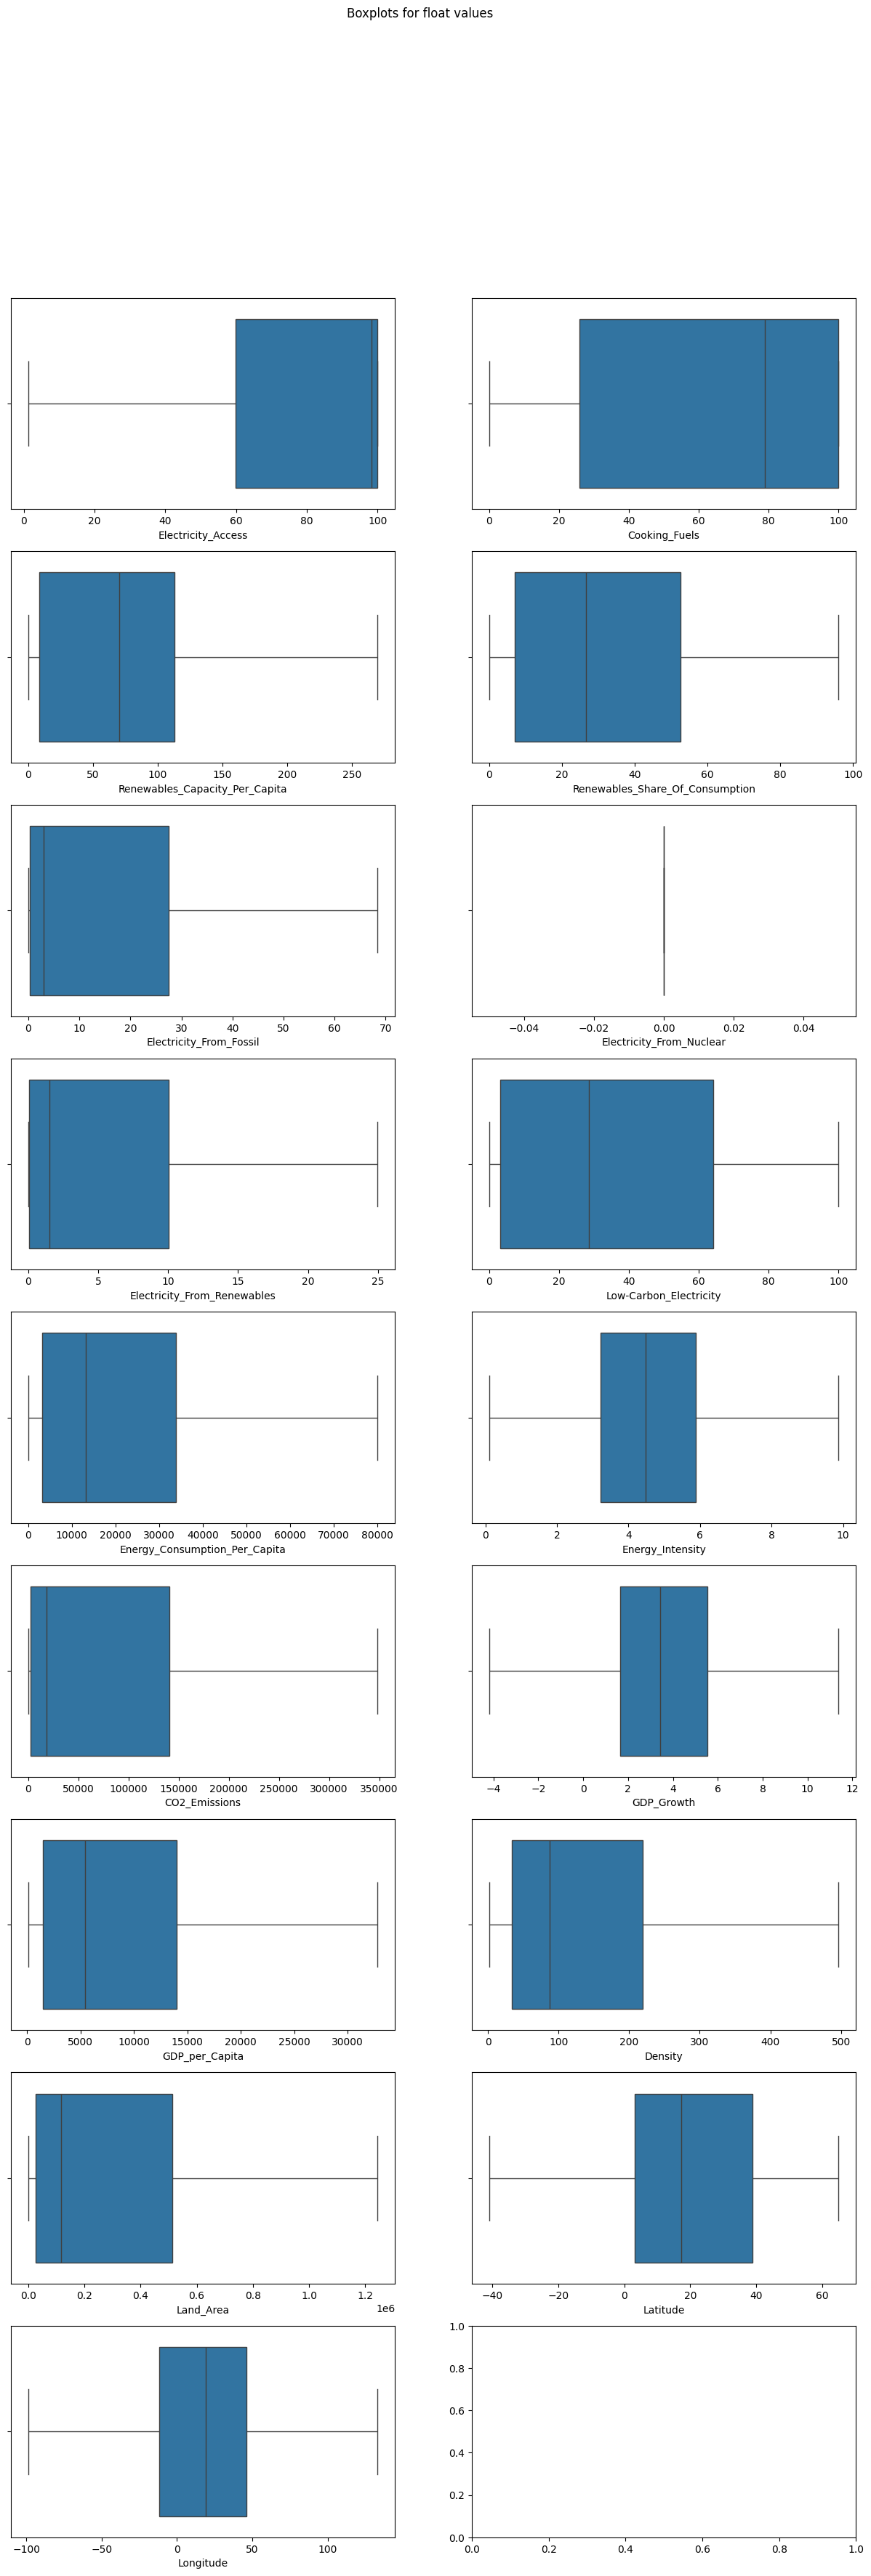

In [28]:
i = 2
num_columns = df.shape[1]
fig, axes = plt.subplots(math.ceil((num_columns-2)/2),2, figsize=(15,40))
fig.suptitle("Boxplots for float values")

while i < num_columns:
    sns.boxplot(ax=axes[(i - 2) // 2, (i - 2) % 2], x=df[list(df.columns)[i]])
    i = i + 1

plt.show()

##Visualizations

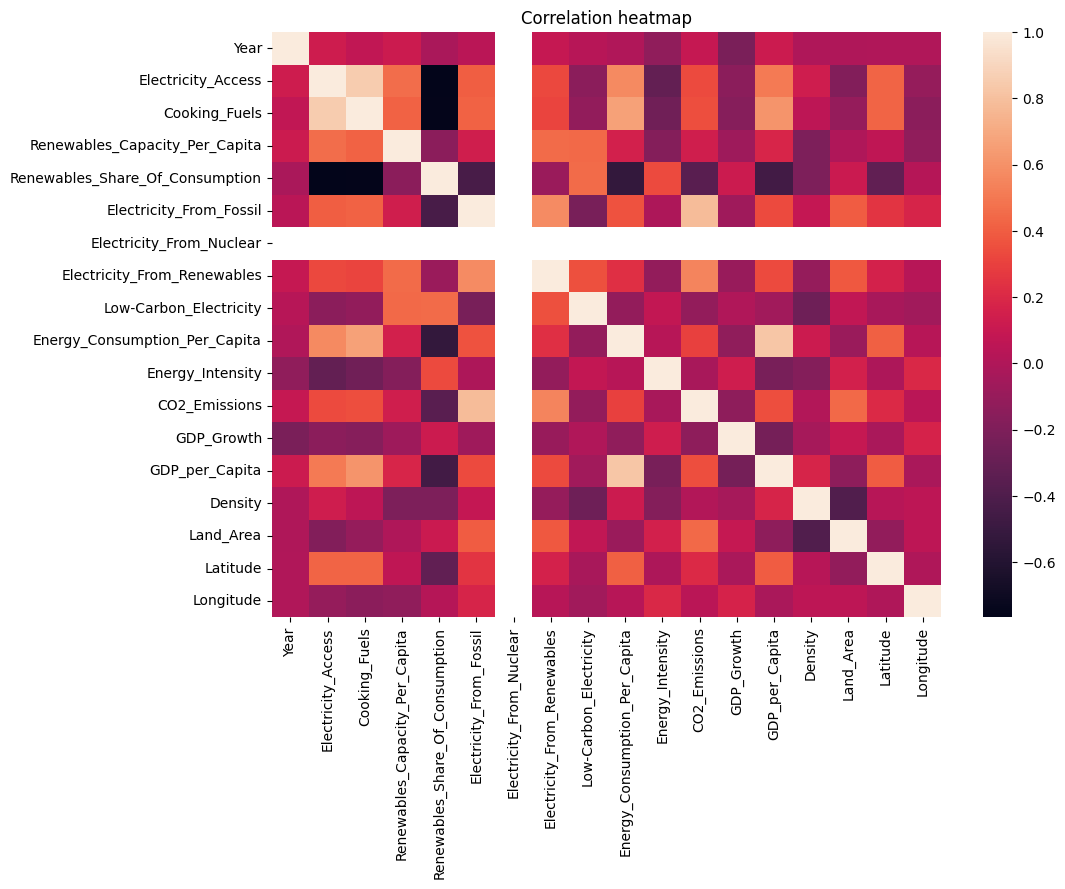

In [29]:
#correlation between column
plt.figure(figsize=[2*5.4, 2*3.8])
sns.heatmap(df.corr(method='pearson', numeric_only=True), annot=False)
plt.title('Correlation heatmap')
plt.show()

#Compaire with different features

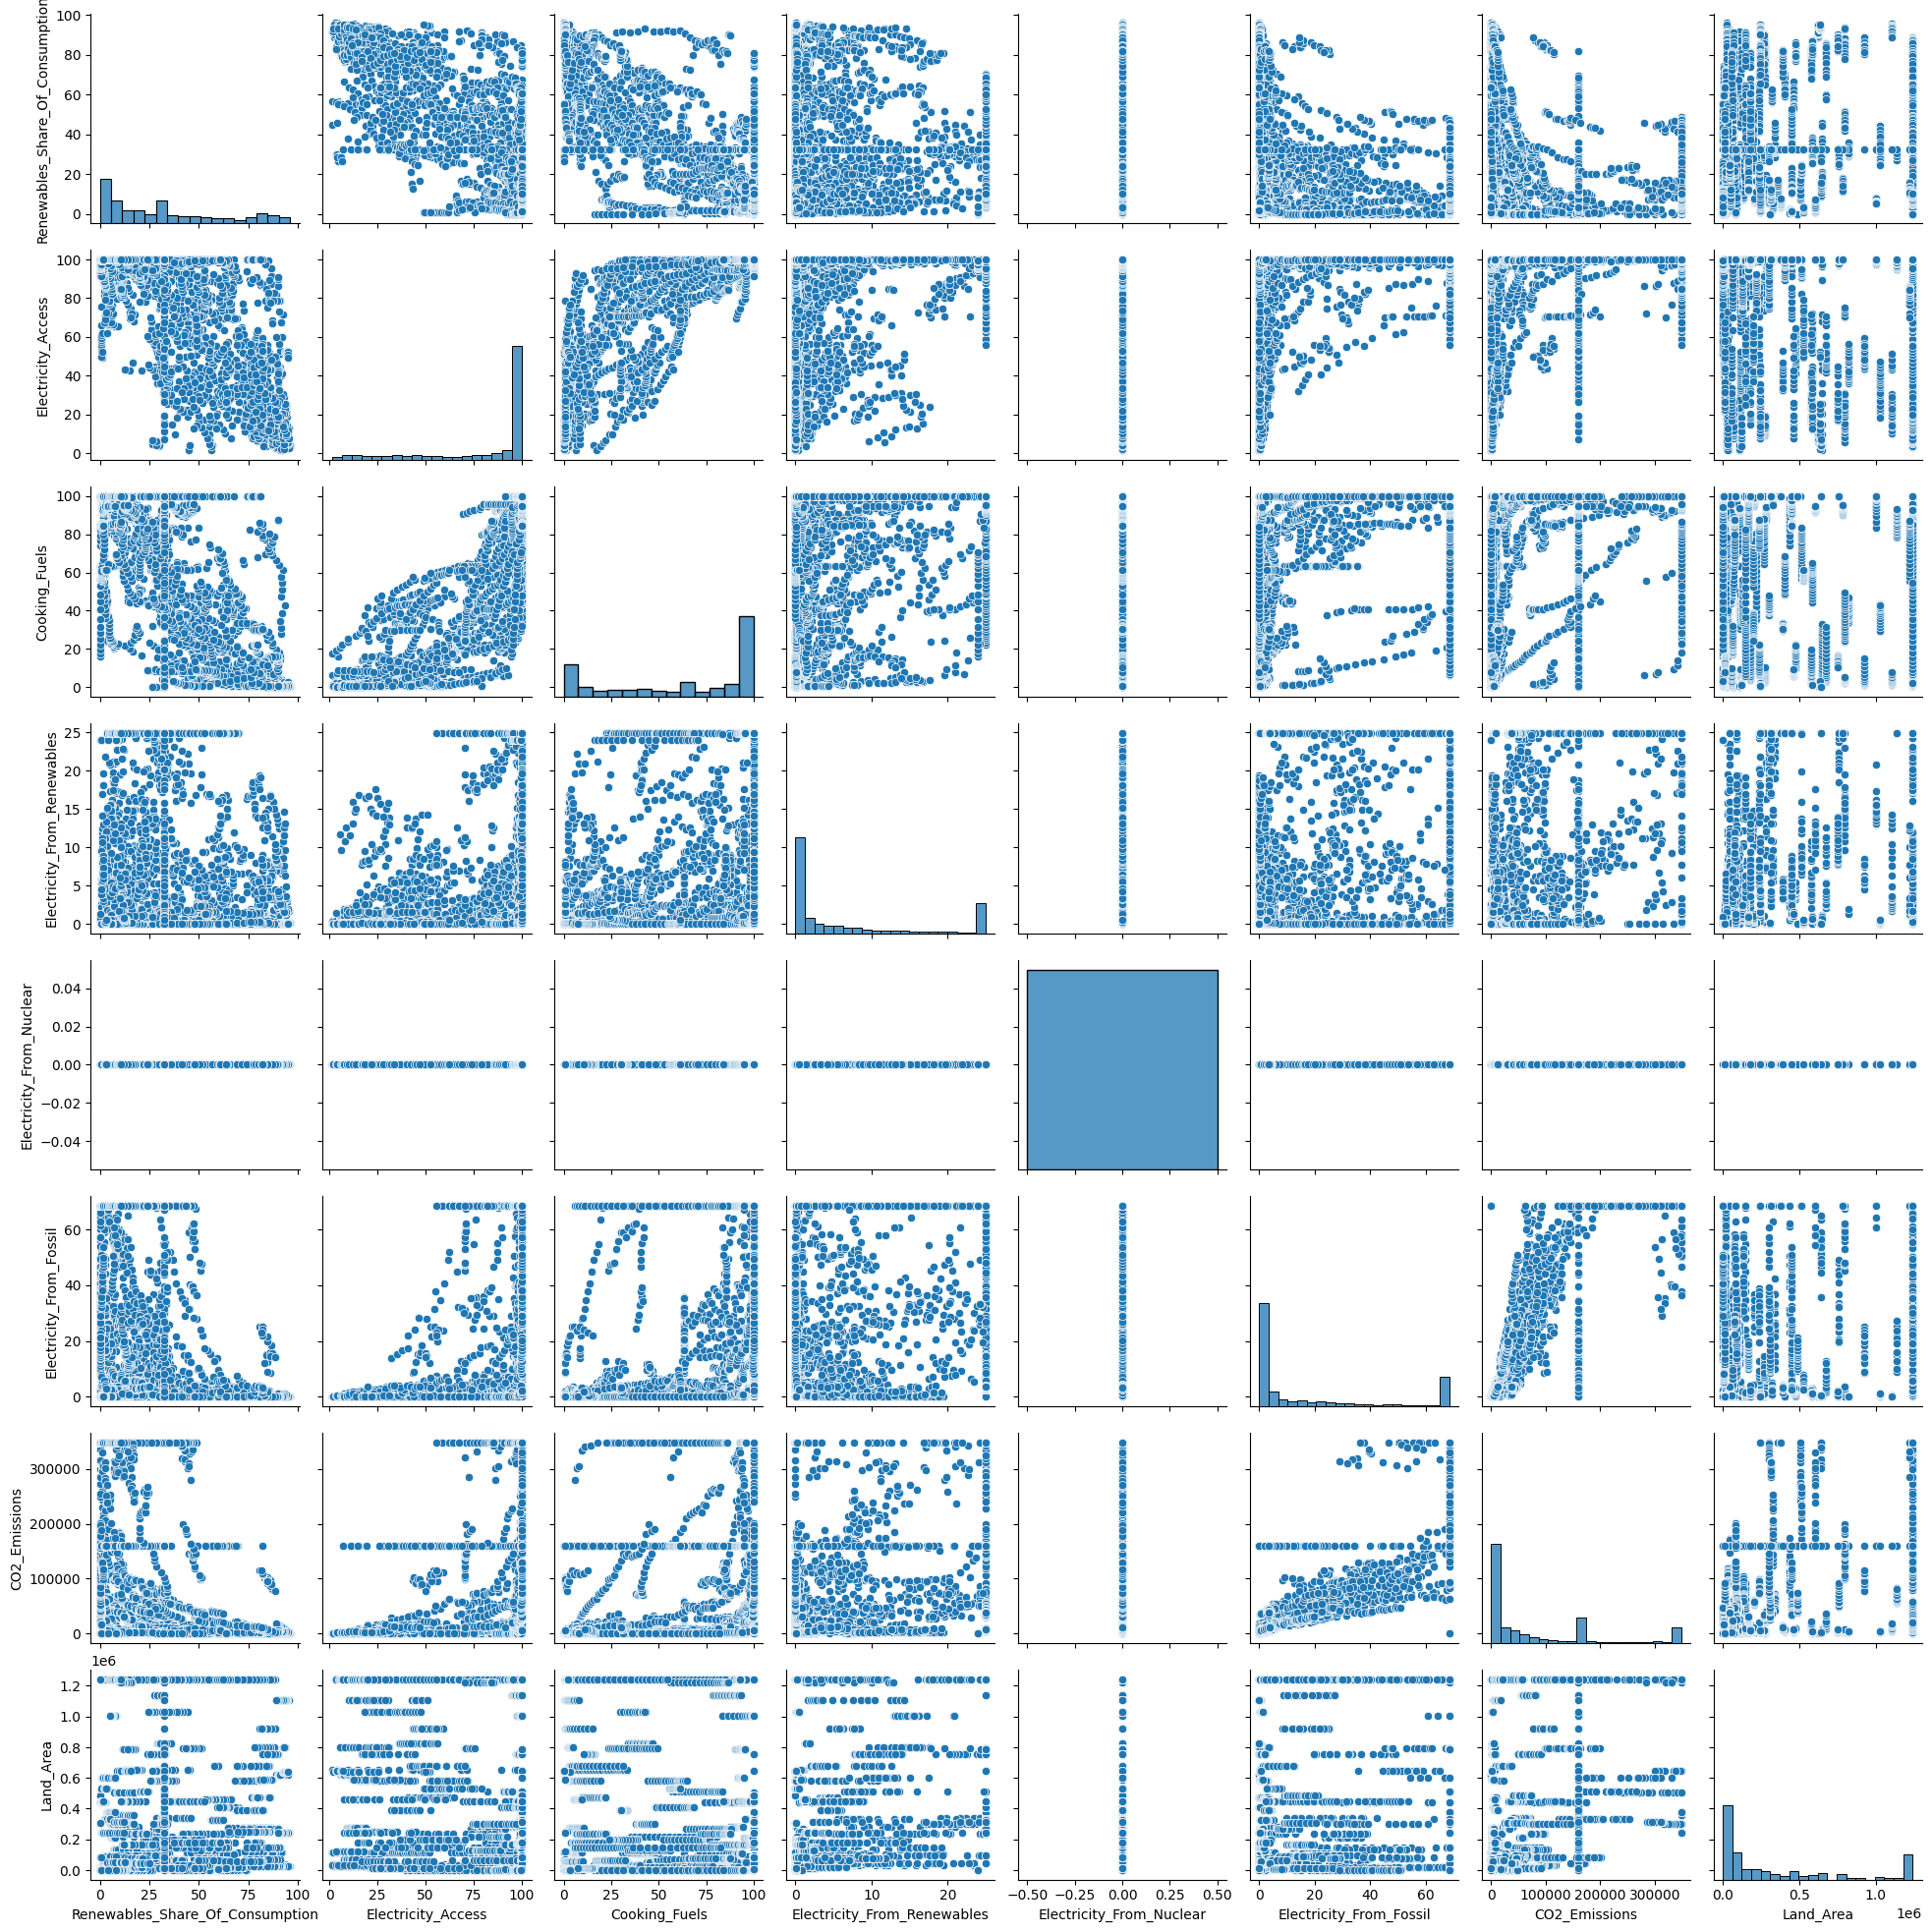

In [30]:
sns.pairplot(df[["Renewables_Share_Of_Consumption", "Electricity_Access", "Cooking_Fuels", "Electricity_From_Renewables", "Electricity_From_Nuclear", "Electricity_From_Fossil", "CO2_Emissions", "Land_Area"]])

#Data Engineering
-Even though the dataset has many useful columns, some additional data can be gathered by performing operations on the existing data. The dataset has the column "GDP_Growth" but does not have "growth" variables for other variables such as CO2_Emissions or Renewables_Share_Of_Consumption. It has columns for Density and Land_Area but not population. These can be easily engineered from the existing data.

In [31]:
df = df.sort_values(by=["Country","Year"])

df["CO2_Emissions_Growth"] = df.groupby("Country")["CO2_Emissions"].pct_change() * 100
df["Renewables_SOC_Growth"] = df.groupby("Country")["Renewables_Share_Of_Consumption"].pct_change() * 100
df["Nuclear_Growth"] = df.groupby("Country")["Electricity_From_Nuclear"].pct_change() * 100
df["Fossil_Fuels_Growth"] = df.groupby("Country")["Electricity_From_Fossil"].pct_change() * 100
df["Renewables_Growth"] = df.groupby("Country")["Electricity_From_Renewables"].pct_change() * 100

df["Population"] = df["Density"] * df["Land_Area"]

df.head(20)

,Country,Year,Electricity_Access,Cooking_Fuels,Renewables_Capacity_Per_Capita,Renewables_Share_Of_Consumption,Electricity_From_Fossil,Electricity_From_Nuclear,Electricity_From_Renewables,Low-Carbon_Electricity,...,Density,Land_Area,Latitude,Longitude,CO2_Emissions_Growth,Renewables_SOC_Growth,Nuclear_Growth,Fossil_Fuels_Growth,Renewables_Growth,Population
0,Afghanistan,2000,1.613591,6.20,9.22,44.99,0.16,0.0,0.31,65.957440,...,60.0,652230.0,33.93911,67.709953,NaN,NaN,NaN,NaN,NaN,39133800.0
1,Afghanistan,2001,4.074574,7.20,8.86,45.60,0.09,0.0,0.50,84.745766,...,60.0,652230.0,33.93911,67.709953,-3.947368,1.355857,NaN,-43.750000,61.290323,39133800.0
2,Afghanistan,2002,9.409158,8.20,8.47,37.83,0.13,0.0,0.56,81.159424,...,60.0,652230.0,33.93911,67.709953,41.095886,-17.039474,NaN,44.444444,12.000000,39133800.0
3,Afghanistan,2003,14.738506,9.50,8.09,36.66,0.31,0.0,0.63,67.021280,...,60.0,652230.0,33.93911,67.709953,18.446608,-3.092784,NaN,138.461538,12.500000,39133800.0
4,Afghanistan,2004,20.064968,10.90,7.75,44.24,0.33,0.0,0.56,62.921350,...,60.0,652230.0,33.93911,67.709953,-15.573775,20.676487,NaN,6.451613,-11.111111,39133800.0
5,Afghanistan,2005,25.390894,12.20,7.51,33.88,0.34,0.0,0.59,63.440857,...,60.0,652230.0,33.93911,67.709953,50.485436,-23.417722,NaN,3.030303,5.357143,39133800.0
6,Afghanistan,2006,30.718690,13.85,7.40,31.89,0.20,0.0,0.64,76.190475,...,60.0,652230.0,33.93911,67.709953,13.548390,-5.873672,NaN,-41.176471,8.474576,39133800.0
7,Afghanistan,2007,36.051010,15.30,7.25,28.78,0.20,0.0,0.75,78.947370,...,60.0,652230.0,33.93911,67.709953,0.568181,-9.752273,NaN,0.000000,17.187500,39133800.0
8,Afghanistan,2008,42.400000,16.70,7.49,21.17,0.19,0.0,0.54,73.972600,...,60.0,652230.0,33.93911,67.709953,101.129942,-26.441974,NaN,-5.000000,-28.000000,39133800.0
9,Afghanistan,2009,46.740050,18.40,7.50,16.53,0.16,0.0,0.78,82.978720,...,60.0,652230.0,33.93911,67.709953,37.078657,-21.917808,NaN,-15.789474,44.444444,39133800.0


In [32]:
df_subset = df[["Country", "Latitude", "Longitude", "CO2_Emissions_Growth", "Renewables_SOC_Growth", "Fossil_Fuels_Growth", "Nuclear_Growth", "Renewables_Growth"]].copy()


df_subset = df_subset.dropna(subset=["Country", "Latitude", "Longitude"])
df_subset = df_subset.fillna(0)
df_subset = df_subset.replace([np.inf, -np.inf], 0)



# df_subset_dropped_nan = df_subset.dropna()
df_aggregated = df_subset.groupby("Country").mean()
# df_aggregated["Log_Renewables_Growth"] = np.log(df_aggregated["Renewables_Growth"])

df_aggregated = df_aggregated.reset_index()
#check aggregated value with description
df_aggregated.describe()

,Latitude,Longitude,CO2_Emissions_Growth,Renewables_SOC_Growth,Fossil_Fuels_Growth,Nuclear_Growth,Renewables_Growth
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.0,175.000000
mean,18.301850,14.588730,905.665271,110.224413,5.340433,0.0,8.758595
std,24.195572,59.936618,5884.754961,563.093401,9.595787,0.0,15.689812
min,-40.900557,-98.749146,-2.898126,-3.819968,-19.841270,0.0,-14.285714
25%,3.561041,-11.360362,4.388021,-2.293408,0.000000,0.0,0.000070
50%,17.189877,19.374390,39.677417,1.419771,2.999200,0.0,3.831707
75%,39.021963,45.639389,193.421624,14.507395,7.039069,0.0,9.906168
max,64.963051,133.168873,76122.126794,5183.446384,66.943602,0.0,134.278068


##***Geographical map data visualiztion***

In [39]:
import geopandas as gpd
from google.colab import files
uploaded = files.upload()
file_path = "/content/ne_110m_admin_0_countries.shp"  # Update with the correct file name if different

worldMap = gpd.read_file(file_path)
print("Shapefile loaded successfully!")
display(worldMap.head())

Saving ne_110m_admin_0_countries.shx to ne_110m_admin_0_countries.shx
Shapefile loaded successfully!


,geometry
0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [40]:
gdf_map = gpd.GeoDataFrame(df_aggregated, geometry=gpd.points_from_xy(df_aggregated.Longitude, df_aggregated.Latitude), crs="EPSG:4326").reset_index()

# gdp.datasets is deprecated
# The dataset is public domain on naturalearthdata.com
# https://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-admin-0-countries/
worldMap = gpd.read_file("/content/ne_110m_admin_0_countries.shp")

joined = gpd.sjoin(worldMap, gdf_map, predicate='contains', how="left")

<ipython-input-40-b1f56a0f5591>:8: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  joined = gpd.sjoin(worldMap, gdf_map, predicate='contains', how="left")


#Fossil_Fuels_Growth in map

<Figure size 640x480 with 0 Axes>

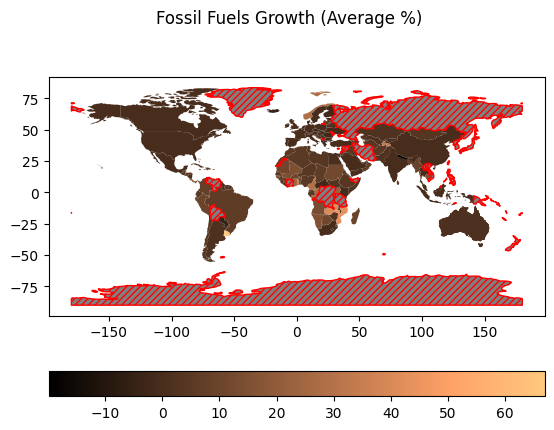

In [42]:
fig = plt.figure()
p = joined.plot(column="Fossil_Fuels_Growth", cmap='copper', legend=True, missing_kwds={'color': 'gray', "edgecolor": "red", "hatch": "/////"}, legend_kwds={"orientation": "horizontal"})
plt.suptitle("Fossil Fuels Growth (Average %)")
plt.gca().set_aspect('equal')
plt.show()

#Renewables energy Growth in map

<Figure size 640x480 with 0 Axes>

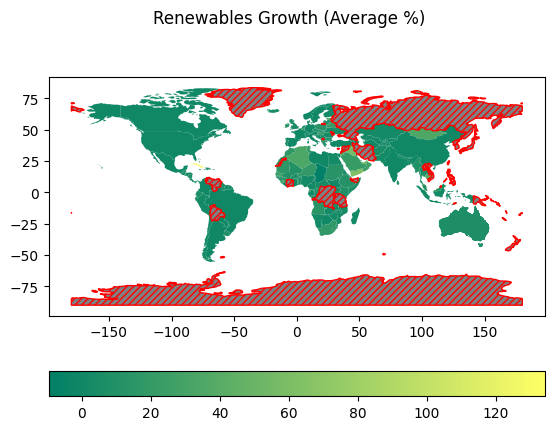

In [44]:
fig = plt.figure()
p = joined.plot(column="Renewables_Growth", cmap='summer', legend=True, missing_kwds={'color': 'gray', "edgecolor": "red", "hatch": "/////"}, legend_kwds={"orientation": "horizontal"})
plt.suptitle("Renewables Growth (Average %)")
plt.gca().set_aspect('equal')
plt.show()

#Nuclear energy growth in map

<Figure size 640x480 with 0 Axes>

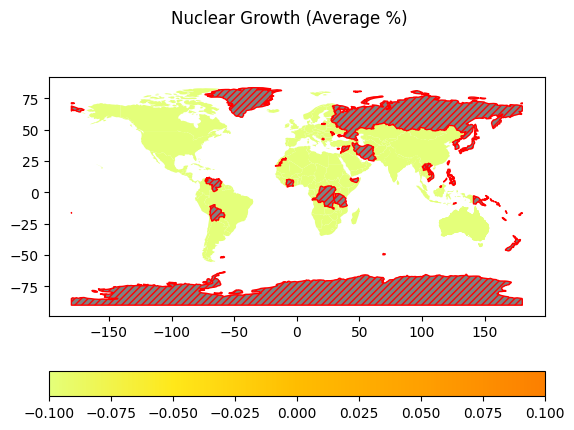

In [45]:
fig = plt.figure()
p = joined.plot(column="Nuclear_Growth", cmap='Wistia', legend=True, missing_kwds={'color': 'gray', "edgecolor": "red", "hatch": "/////"}, legend_kwds={"orientation": "horizontal"})
plt.suptitle("Nuclear Growth (Average %)")
plt.gca().set_aspect('equal')
plt.show()

#CO2 Emissions Growth

<Figure size 640x480 with 0 Axes>

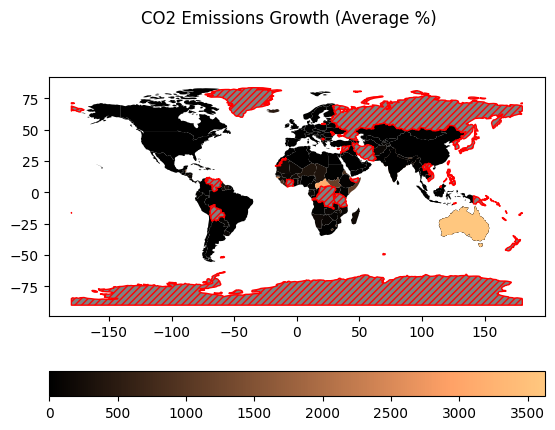

In [46]:
fig = plt.figure()
p = joined.plot(column="CO2_Emissions_Growth", cmap='copper', legend=True, missing_kwds={'color': 'gray', "edgecolor": "red", "hatch": "/////"}, legend_kwds={"orientation": "horizontal"})
plt.suptitle("CO2 Emissions Growth (Average %)")
plt.gca().set_aspect('equal')
plt.show()

#Scatterplot of Electricity Access vs GDP Per Capita

In [55]:
#actual datset without column name change because this content GDP_per_capita
df1.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,"6,52,230",33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,"6,52,230",33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,"6,52,230",33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,"6,52,230",33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,"6,52,230",33.93911,67.709953


Text(0, 0.5, 'Electricity Access (% Population)')

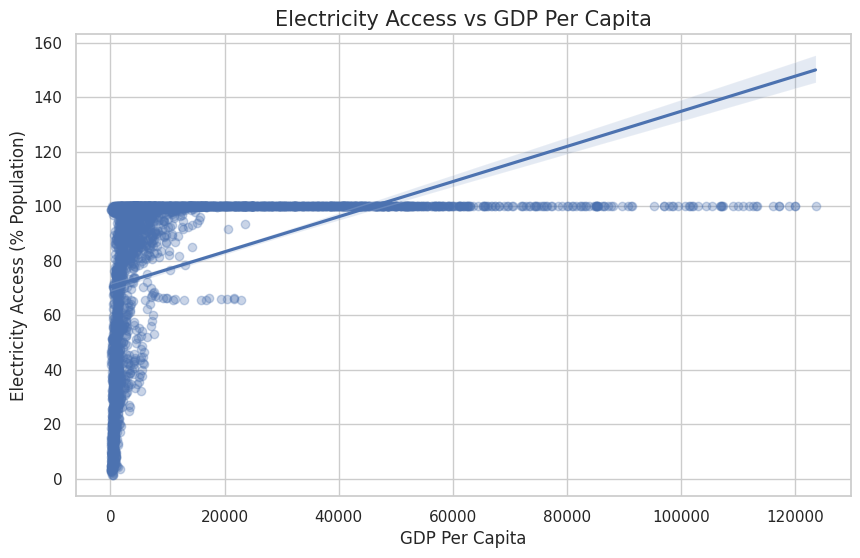

In [56]:
plt.figure(figsize=(10,6))
sns.regplot(x='gdp_per_capita', y='Access to electricity (% of population)', data=df, scatter_kws={'alpha':0.3})
plt.title('Electricity Access vs GDP Per Capita', size=15)
plt.xlabel('GDP Per Capita')
plt.ylabel('Electricity Access (% Population)')

#Scatterplot of Renewable Share vs Electricity Access

Text(0, 0.5, 'Electricity Access (% Population)')

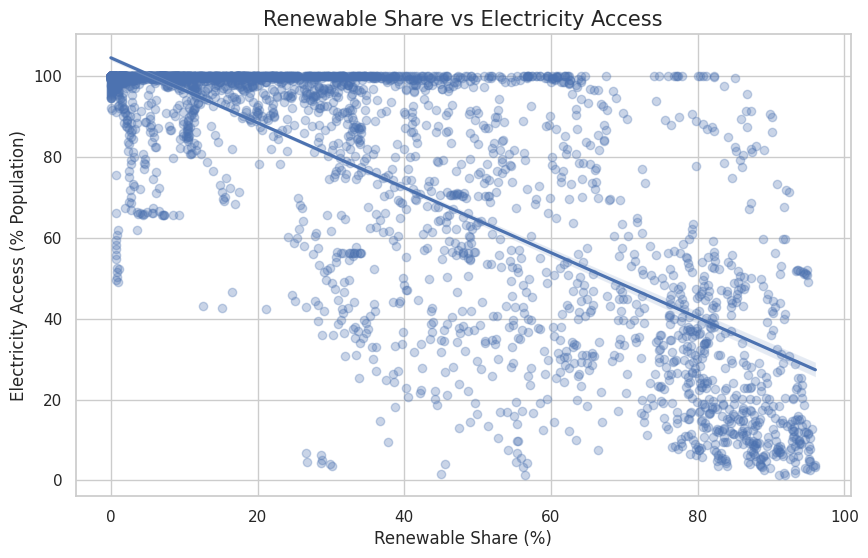

In [57]:
plt.figure(figsize=(10,6))
sns.regplot(x='Renewable energy share in the total final energy consumption (%)', y='Access to electricity (% of population)', data=df, scatter_kws={'alpha':0.3})
plt.title('Renewable Share vs Electricity Access', size=15)
plt.xlabel('Renewable Share (%)')
plt.ylabel('Electricity Access (% Population)')

#Scatterplot of Renewable Share vs GDP Growth

Text(0, 0.5, 'Renewable Share (%)')

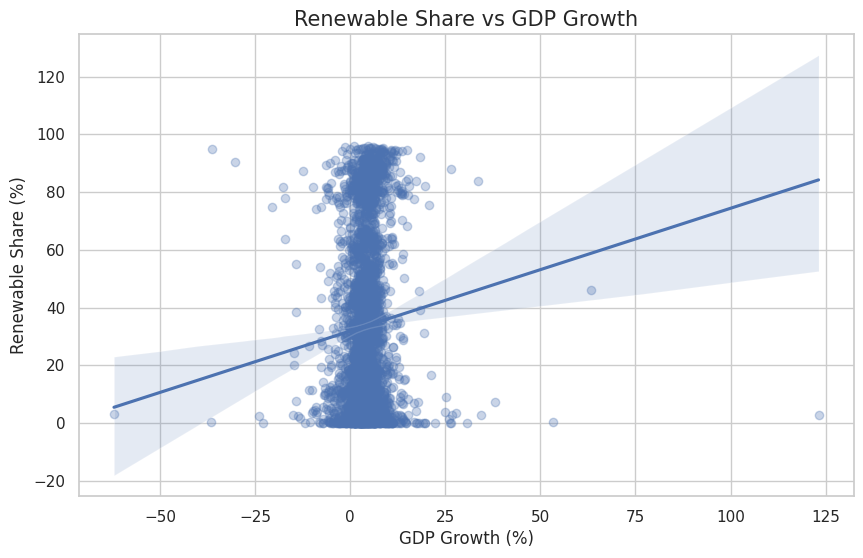

In [58]:
plt.figure(figsize=(10,6))
sns.regplot(x='gdp_growth', y='Renewable energy share in the total final energy consumption (%)', data=df, scatter_kws={'alpha':0.3})
plt.title('Renewable Share vs GDP Growth', size=15)
plt.xlabel('GDP Growth (%)')
plt.ylabel('Renewable Share (%)')